In [3]:
%matplotlib inline
import os
import wget ## used "sudo pip install wget" in command line to get package.
import Incremental_U as IncU ## Get this sorted
import Incremental_C as IncC
import pprint
import subprocess

In [8]:
Working_dir = "/home/djeffrie/Data/Caspers_data/lane2/"

### Ustacks tests

In [11]:
## INPUT INCREMENTAL_U PARAMETERS HERE -----------------------------------------

parameters = ["M","m", "MS"]                                             ## List, eg ["M", "m", "MS"]. If only testing 1 param, this must still be a list e.g. ["M"]
M_vals =   [1,2,3,4,5,6,7]                                              ## List, eg range(1,5,1) this would give [1,2,3,4]
m_vals =   [1,2,3,4,5,6,7]                                              ## List, eg range(1,5,1) this would give [1,2,3,4]
MS_vals =  [2,3,4]                                                 ## List, eg range(1,5,1) this would give [1,2,3,4]
threads =  7                                                        ## Int. eg 7
parent_dir = "%s/%s" % (Working_dir, "Ustacks_tests/" )    ## Absolute Dir containing the demultiplexed raw read fasta/fastq files
run_cline_switch = 1                                             ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs

## Making input dictionary --------------------------------------

Setup_dict = {}
Setup_dict["parameters"] = {}
Setup_dict["threads"] = threads
Setup_dict["parent_directory"] = parent_dir
Setup_dict["run_cline_switch"] = run_cline_switch
Setup_dict["verbose"] = False

for param in parameters:
    if "M" in param:
        Setup_dict["parameters"][param] = M_vals
    if "m" in param:
        Setup_dict["parameters"][param] = m_vals
    if "MS" in param:
        Setup_dict["parameters"][param] = MS_vals

#pp = pprint.PrettyPrinter(indent=2)
#pp.pprint(Setup_dict)


##### ------- Test samples, parameters and values ------ #####

{ 'C210_S.fq.gz': { 'M': { 1: { }, 2: { }, 3: { }, 4: { }, 5: { }, 6: { }, 7: { }},
                    'MS': { 2: { }, 3: { }, 4: { }},
                    'm': { 1: { }, 2: { }, 3: { }, 4: { }, 5: { }, 6: { }, 7: { }}},
  'C228_S.fq.gz': { 'M': { 1: { }, 2: { }, 3: { }, 4: { }, 5: { }, 6: { }, 7: { }},
                    'MS': { 2: { }, 3: { }, 4: { }},
                    'm': { 1: { }, 2: { }, 3: { }, 4: { }, 5: { }, 6: { }, 7: { }}},
  'C248_S.fq.gz': { 'M': { 1: { }, 2: { }, 3: { }, 4: { }, 5: { }, 6: { }, 7: { }},
                    'MS': { 2: { }, 3: { }, 4: { }},
                    'm': { 1: { }, 2: { }, 3: { }, 4: { }, 5: { }, 6: { }, 7: { }}},
  'C256_P.fq.gz': { 'M': { 1: { }, 2: { }, 3: { }, 4: { }, 5: { }, 6: { }, 7: { }},
                    'MS': { 2: { }, 3: { }, 4: { }},
                    'm': { 1: { }, 2: { }, 3: { }, 4: { }, 5: { }, 6: { }, 7: { }}},
  'C259_S.fq.gz': { 'M': { 1: { }, 2: { }, 3: {

/home/djeffrie/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


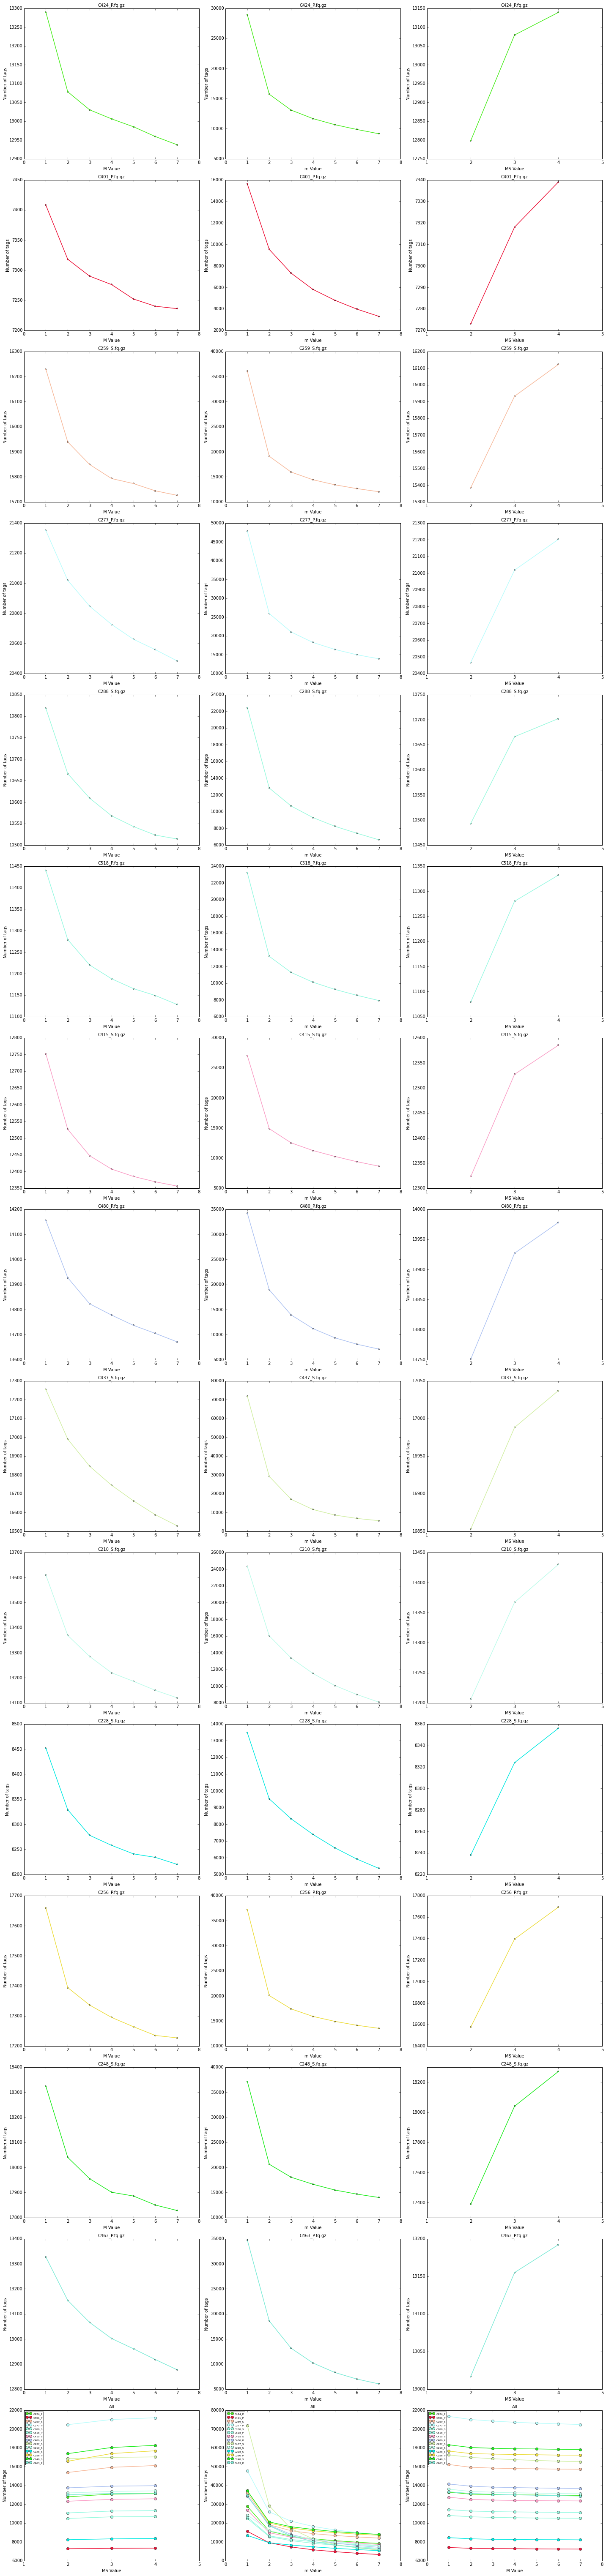

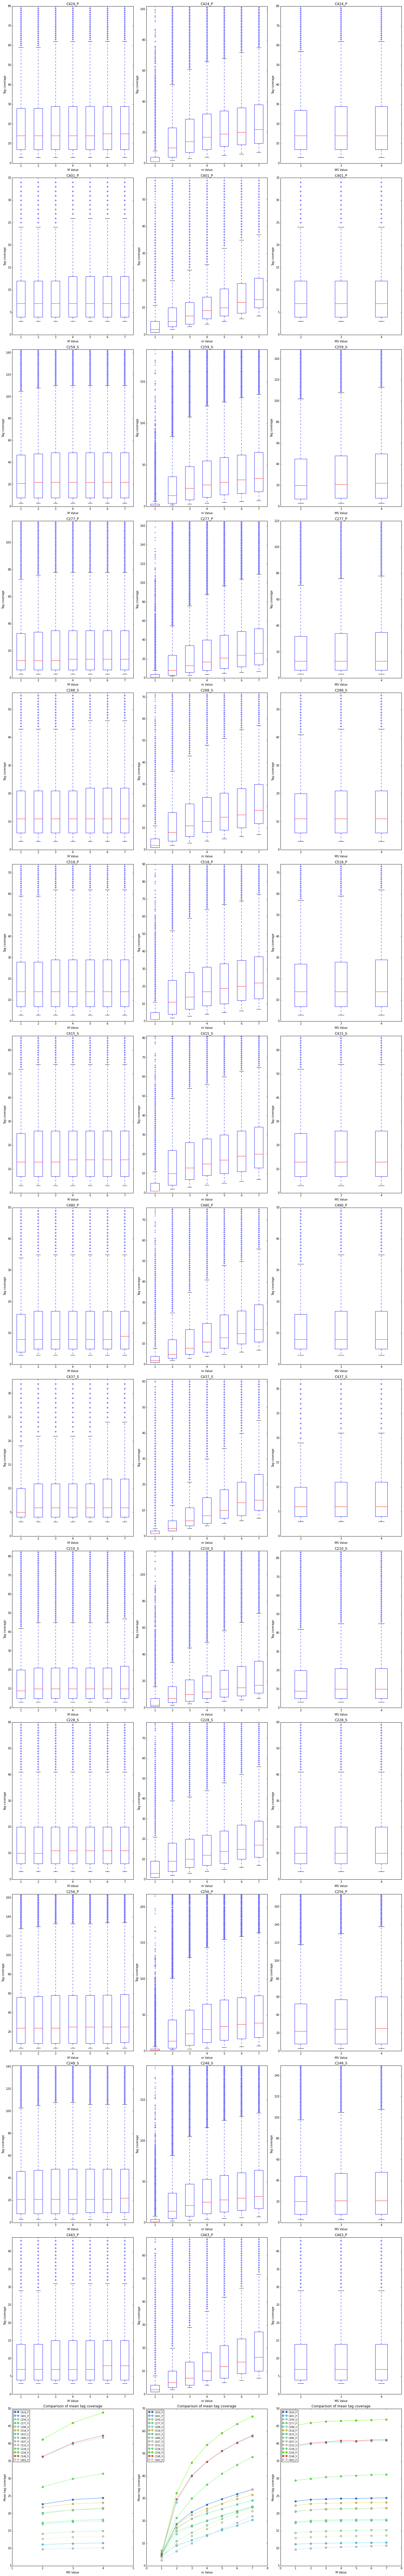

In [12]:
Incremental_U_outputs = IncU.IncreMental_U(Setup_dict)

In [8]:
help(IncU.coverage_counter)

Help on function coverage_counter in module Incremental_U:

coverage_counter(file_name, verb)
    This function calculates the coverage of each tag in the ustacks tags.tsv output
    as long as that locus has not been blacklisted. It outputs a text file containing all 
    tag IDs and coverage values, as well as a histogram of the tag coverage into the same 
    directory as the input file.
    
    - filename: the full path to the tags.tsv file
    
    This function works in conjuction with coverage_counter_looper and returns a dictionary for this.



In [15]:
for root,dirs,files in os.walk("/home/djeffrie/Data/Caspers_data/Stacks_final_outs/"):
    for fil in files:
        if "tags.tsv" in fil and "catalog" not in fil:
            infile = "%s/%s" % (root, fil)
            IncU.coverage_counter(infile, False)

IndexError: list index out of range

###Cstacks tests

In [3]:
## Get sample IDs
Parameter_dict["Get_IDs"] = True ## Set as true to get the IDs for the samples in the test directory. It will not run the rest of the pipeline
IncC.Incremental_C(Parameter_dict)

NameError: name 'Parameter_dict' is not defined

In [3]:
## INPUT OTHER INCREMENTAL_C PARAMETERS HERE -----------------------------------------

Parameter_dict = {}
Parameter_dict["batch_ID"] = 1
Parameter_dict["n_vals"] = [1,2,3,4]  ## Include the sample ID of between 2 and 4 samples. Or leave blank to get a 4 way venn of 4 random samples.
Parameter_dict["threads"] = 7
Parameter_dict["Ustacks_outs_dir"] = "/home/djeffrie/Data/Caspers_data/Cstacks/"
Parameter_dict["sample_ids"] = [43,36,34,30]   ## add specific sample ID's of samples you want to look at, if this is not all samples in the directory given above. Leave as empty list if not.
Parameter_dict["run_cline_switch"] = 0     ## to switch on (1) to run stacks cline or off (0) to run pipeline on existing outputs
Parameter_dict["Get_IDs"] = False## Set as true to get the IDs for the samples in the test directory. It will not run the rest of the pipeline

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(Parameter_dict)

{ 'Get_IDs': False,
  'Ustacks_outs_dir': '/home/djeffrie/Data/Caspers_data/Cstacks/',
  'batch_ID': 1,
  'n_vals': [1, 2, 3, 4],
  'run_cline_switch': 0,
  'sample_ids': [43, 36, 34, 30],
  'threads': 7}



### ----- Making and running command lines ----- ###

n value = 1
cstacks -b 1 -n 1 -s /home/djeffrie/Data/Caspers_data/Cstacks//C259_S -s /home/djeffrie/Data/Caspers_data/Cstacks//C248_S -s /home/djeffrie/Data/Caspers_data/Cstacks//C256_P -s /home/djeffrie/Data/Caspers_data/Cstacks//C277_P 7 -o /home/djeffrie/Data/Caspers_data/Cstacks//n_1

n value = 2
cstacks -b 1 -n 2 -s /home/djeffrie/Data/Caspers_data/Cstacks//C259_S -s /home/djeffrie/Data/Caspers_data/Cstacks//C248_S -s /home/djeffrie/Data/Caspers_data/Cstacks//C256_P -s /home/djeffrie/Data/Caspers_data/Cstacks//C277_P 7 -o /home/djeffrie/Data/Caspers_data/Cstacks//n_2

n value = 3
cstacks -b 1 -n 3 -s /home/djeffrie/Data/Caspers_data/Cstacks//C259_S -s /home/djeffrie/Data/Caspers_data/Cstacks//C248_S -s /home/djeffrie/Data/Caspers_data/Cstacks//C256_P -s /home/djeffrie/Data/Caspers_data/Cstacks//C277_P 7 -o /home/djeffrie/Data/Caspers_data/Cstacks//n_3

n value = 4
cstacks -b 1 -n 4 -s /home/djeffrie/Data/Caspers_data/Cstacks//

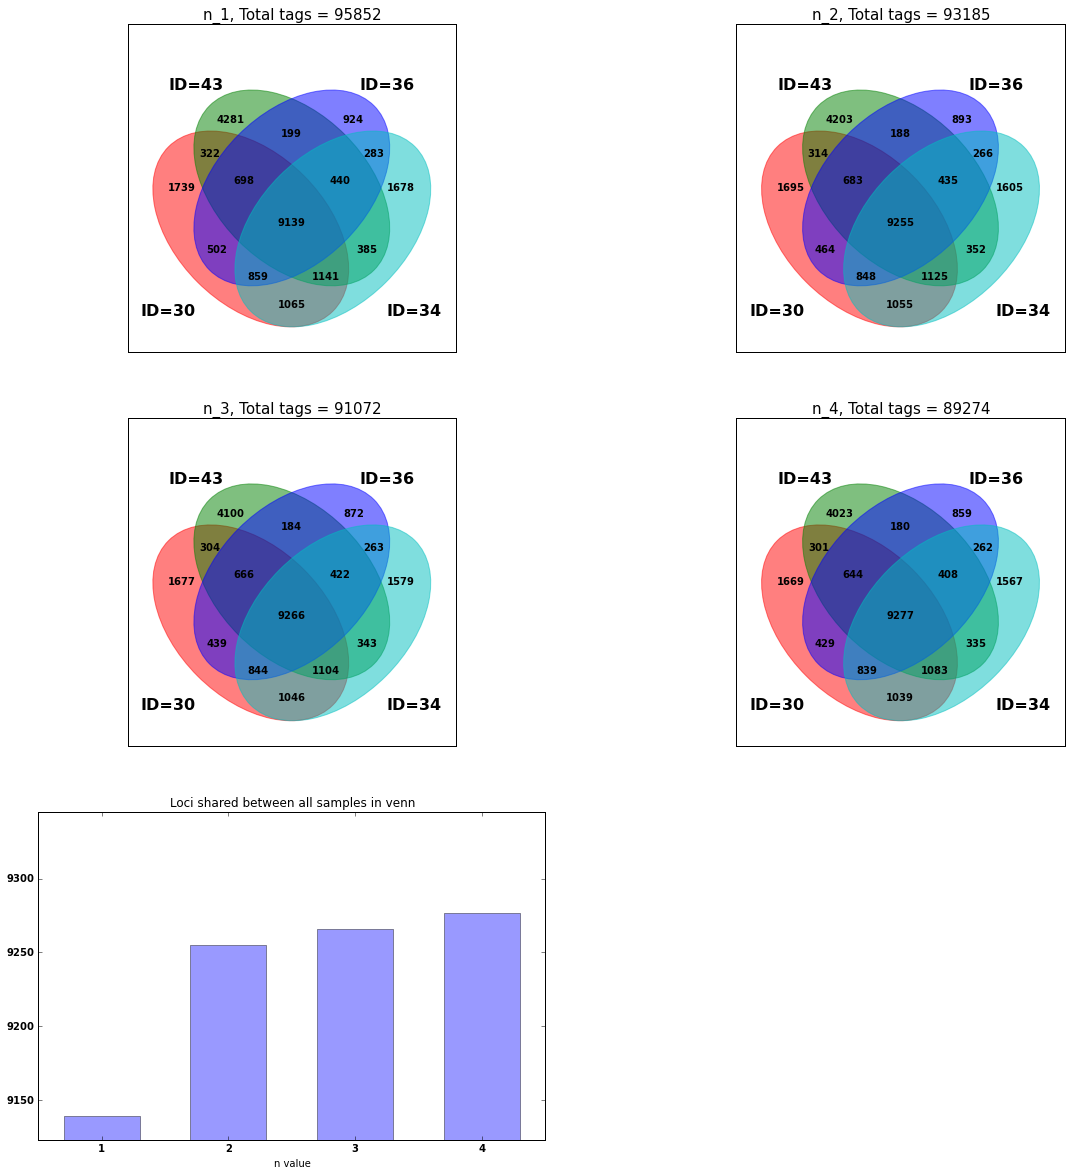

In [4]:
IncC.Incremental_C(Parameter_dict)